In [ ]:
#deadline 12 Jan 2023
# Fine delle consegne: giovedì, 12 gennaio 2023, 20:00 (6 giorni mancanti)

# Description
<img src="./16_description.png" alt="Description not found " />

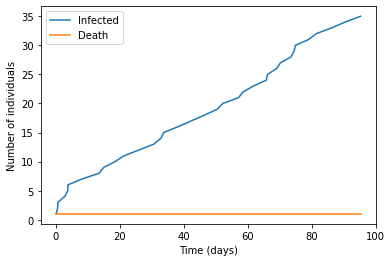

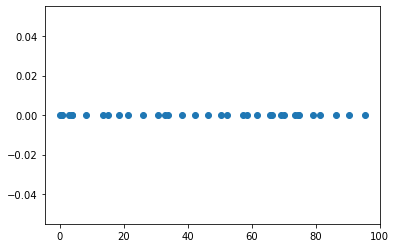

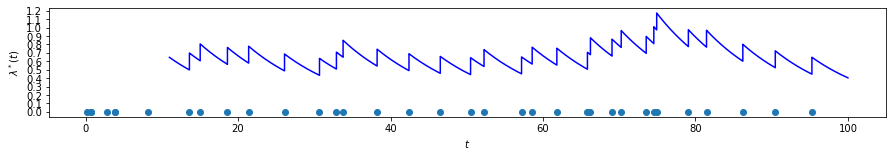

In [2]:
#importing the libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar , minimize
np.random.seed(34)

#defining some of the required functions 
# based on the slides, s=s + thau and thau is from the same distro as h(t), h(t) can be uniform or exp
# we use h(t) and sigma to create the new time 
# h(t)s are the decay kernel function
#h2 in prof's question is different from what there is in the page 11 of that pdf
        
def sigma(t):
    return 20 * (t >= 0) * (t <= 10)

#uniform h(t)
def h_uniform(t):
    return np.random.uniform(0, 20) 
#exponential h(t)
def h_expo(t): 
    lambda_exp = 1/10
    return lambda_exp * math.exp(-0.1 * (lambda_exp * t))
# intensity_at_s = sigma(s) + decay*sum(mu * np.exp(-0.1*(s - t)) for t in event_times)

# intensity_prob = sigma(s) +decay * sum( h1(s - t) for t in event_times)


def hawkes_simulation(decay, T):
    s=0
    dead_ppl=0#counts the number of dead people 
    dead_ppl_list=[] # to create the plot
    event_times=[]  # set of event times
    infected_ppl=1 #number of infected people, it should be equal to 1 in the beggining of the simulation
    last_infected=1
    infected_ppl_list=[]
    while s<T:
#         intensity_at_s = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times)
        intensity_at_s = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)

        delta_t=np.random.uniform(0,5) # this should be from the same distro as h(t)
#         delta_t=mu * np.exp(-beta*(s))
        s+=delta_t
        ra=np.random.uniform()
#         intensity_prob = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times)
        intensity_prob = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)
        # the below line is used to add some randomness to the code for creaing an event
        temp_prob=[]
        if ra < intensity_prob/intensity_at_s: # or D * intensity_at_s < intensity_prob
#             temp_prob=0
#             for i in range(last_infected):
#                 temp_prob+=np.random.poisson(2) #we choose the value 2 which is the reproduction rate
#             last_infected=temp_prob
#             temp_prob=[np.random.poisson(decay) for i in range(last_infected)]
#             last_infected=sum(temp_prob) # we update the numer of last layer of the infeced tree of ppl
#             infected_ppl+=last_infected
            infected_ppl+=1
            dead_ppl = math.ceil(0.02 * infected_ppl)
            infected_ppl_list.append(infected_ppl-dead_ppl)
            dead_ppl_list.append(dead_ppl)
            tn=s
            event_times.append(tn)
    if s<T:
        
        dead_ppl=math.ceil(0.02 * infected_ppl)  # to only get the number of dead people
        return event_times, dead_ppl, dead_ppl_list,infected_ppl_list
    elif s>=T:
        dead_ppl=math.ceil(0.02 * (infected_ppl-last_infected)) # to only get the number of dead people
        return event_times[:-1] , dead_ppl, dead_ppl_list[:-1],infected_ppl_list[:-1]


        
        
# T= 100 # the upper bound for the  time of our simulation 

# decay=2 #reproduction rate
        
# intensity = 0.5 # is the value lambda 

        
        
event_times,dead_ppl,dead_ppl_list,infected_ppl_list=hawkes_simulation(decay=2,T=100)
plt.figure()
plt.plot(event_times, infected_ppl_list, label='Infected')
plt.plot(event_times, dead_ppl_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.savefig('expo-first_part')
plt.show()




# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

# smp = np.asarray(event_times)

#range_list = np.arange(0, T, .001) # creating  a list with the lenght of the upper bound of the time 
#range_lst in the .py file

'''
description for the line below
This line of code is using a list comprehension to calculate the intensity function of the Hawkes process, λ(x), for a range of time values stored in the range_list array.

It iterates over each value x in the range_list and for each value of x, it calculates the value of the intensity function λ(x) using the following formula:

λ(x) = sigma(x) + 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x])))
sigma(x) is the baseline intensity function, it describes the expected number of events at time x. Here it's fixed and equal to 20 for the times between 0 and 10

The second term of the formula: 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x]))), describes the contribution of past events to the intensity of the process at time x. It is the product of the decay rate 2 and the cumulative sum of the kernel function h(t) at time x, evaluated for all past events t_i that occurred before time x.

The kernel function h(t) is modeled as an exponential decay function and is defined as 0.1 * np.exp(-0.1 * (x - smp[smp < x])) in this case, where smp is the array containing the event times generated by the simulation and smp<x is a Boolean filter that selects only the past events that occurred before time x.

The np.sum function computes the sum of all the elements in the array and 2 * is a scaling factor,
So in total, the code is iterating over the range_list and for each value of x it's calculating the intensity of the event, which is a sum of the baseline intensity and the influence of the past events. And then storing these intensity values in lda_ar list.
'''
# I wrote this in the .py file and changed the lda_ar to ld and smp to sample
#trying to calculate the intensity of the evenets so it makes it possible to visualize 



'''

The first line of code creates a numpy array called "smp" from the list "event_times" which contains the event times of the Hawkes process simulation.

The second line of code creates an array called "range_list" which contains a range of values from 0 to T, incrementing by 0.001.

The third line of code uses list comprehension to create a new list called "lda_ar" which contains the values of the intensity function for each value in range_list. It starts by adding the value of sigma(x) to the sum of the decay kernel function for all event times that are less than x.
The decay kernel function is h(t) = mu * exp(-beta*(t)), in this case, mu = 0.1 and beta = 0.1, this function is used to capture the influence of past events on the current event.
In this case, the sum of the decay kernel function is calculated as 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x]))), this term represents the cumulative effect of past events on the current event, it is calculated by multiplying the decay rate with the exponential decay function of all past events.

In summary, these three lines of code create a numpy array from the event_times list, create a range of values from 0 to T with a small increment, and then create a list of intensity values for each value in the range_list using the sigma and decay kernel functions.




'''




#I also added lambda_exp = 1/10 instead of 0.1
# lda_ar = [ sigma(x) + 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x]))) for x in range_list] 
#I can rewrite this line of code like this as well:
# lda_ar=[]
# for i in range_list:
#     lda_ar.append(sigma(i) + 2 * np.sum(0.1 * np.exp(-0.1 * (i - smp[smp < i]))) )


# I turned this part of the code intor a function so I don't repeat myself 
def intensity_function_v2(event_times, T):
    smp = np.asarray(event_times)
    range_list = np.arange(0, T, .001)
    lda_ar=[]
    for i in range_list:
        lda_ar.append(sigma(i) + 2 * np.sum(0.1 * np.exp(-0.1 * (i - smp[smp < i]))))
    return lda_ar, range_list 

lda_ar,range_list=intensity_function_v2(event_times, T=100)



#I changed the size of the plots in the .py file
plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
# plt.yscale('log')
# plt.ylim(10, 15)
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')
# plt.yticks(np.arange(0, 20, 0.1))
plt.yticks(np.arange(0, 5, 0.1))
_ = plt.plot(range_list[11000:], lda_ar[11000:], 'b-')
plt.scatter(event_times, [0] * len(event_times))
plt.show()
 ### this is what  I wrote for the last plot in the .py file
# plt.figure(figsize=(10,2))
# plt.ylabel("lambda * t")
# plt.yticks(np.arange(0, 5, 0.1))
# _ = plt.plot(range_lst[11000:], ld[11000:], 'b-')
# plt.scatter(event_times, [0] * len(event_times))
# plt.xlabel('Time (in days)')
# plt.show()



This code is simulating a Hawkes process, which is a type of point process that is commonly used to model the timing of events or activities. The code is defining several functions, including one for the Hawkes simulation, and others for generating random values and distributions used within the simulation.

The hawkes_simulation function takes two arguments: decay and T, where decay is the decay rate and T is the upper bound for the time of the simulation.

The simulation starts by initializing some variables like s, dead_ppl, dead_ppl_list, event_times, infected_ppl and infected_ppl_list. Inside while loop, the function updates the variable s with delta_t, which is drawn from a uniform distribution. Then it calculate the intensity probability using the function sigma and function h_uniform, which are defined earlier. Then it compares this probability with a random number and if this random number is less than the intensity probability it means that the event happens, thus increase the infected people count and dead people count.

The simulation runs until s becomes greater than T then it returns the event times, number of dead people, list of dead people and list of infected people. In this case the uniform distribution is used for h(t) but we can use the exponential distribution as well, switching function h_uniform to h_expo would be enough.

It is worth mentioning that the dead people count is a function of infected people that is : dead_ppl = math.ceil(0.02 * infected_ppl)

The code then uses these functions to simulate a Hawkes process for a given decay rate and upper bound of time T.
At the end of the simulation, the function returns the event times, number of dead people, and lists of dead people and infected people

[0.2222833864692697]
[0.2222833864692697, 4.232929874661134]
[0.2222833864692697, 4.232929874661134, 6.727245888449133]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408, 21.187939125806537]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408, 21.187939125806537, 25.09472699872278]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408, 21.187939125806537, 25.09472699872278, 25.899566320716765]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408, 21.187939125806537, 25.09472699872278, 25.899566320716765, 26.061402456964963]
[0.2222833864692697, 4.232929874661134, 6.727245888449133, 9.988330998249467, 13.657976257213408, 21.18793912580653

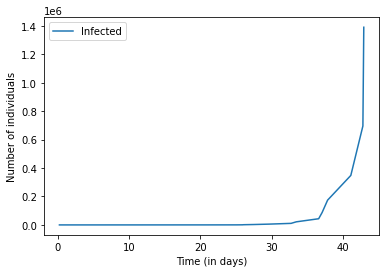

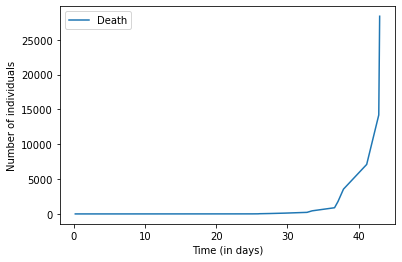

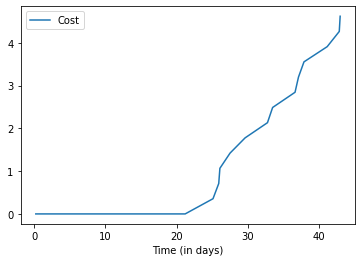

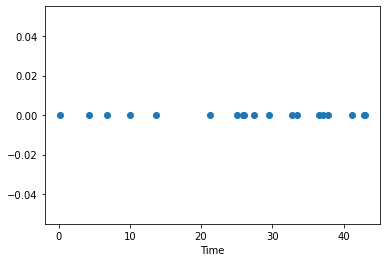

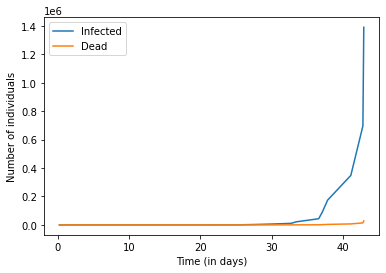

In [3]:
#Second part
# we have to re-do the the whole process but in another way 
#we have sigma and different h(t)s from the previous part 

'''
The first function sigma(t) uses a conditional statement to check if t is between 0 and 10 (inclusive). If true, it returns 20, otherwise it returns 0.
The second function h_uniform(t) returns a random float number between 0 and 20 using numpy's random.uniform function.
The third function h_expo(t) uses the exponential function with a rate of 0.1 and scale of 10.
These three functions are equivalent to the original version of the functions
, but they are written using if-else statement and mathematical expressions instead of a ternary operator and bitwise operator.

'''

def sigma(t):
    return 20 * (t >= 0) * (t <=10)

#uniform h(t)
def h_uniform(t):
    return np.random.uniform(0, 20) 
#exponential h(t)
def h_expo(t): 
    lambda_exp = 1/10
    return lambda_exp * math.exp(-0.1 * (lambda_exp * t))


# intensity_at_s = sigma(s) + decay*sum(mu * np.exp(-0.1*(s - t)) for t in event_times)

# intensity_prob = sigma(s) +decay * sum( h1(s - t) for t in event_times)
'''
defining a scalar optimization problem, where the scalar value of "rho" is chosen to minimize a cost function. 
The cost function is a combination of the cost associated with a given value of "rho" and a term that penalizes values of "rho" 
that result in a high ratio of dead people in the final time step of the simulation,
relative to the overall maximum number of deaths in the simulation. The scalar value of "rho" is chosen using
the minimize_scalar function, which is a scalar optimization algorithm,
with bounds between 0 and 1. This code is using a method called 'bounded' and the result is the value of x.

'''

def optimize_rho(cost, T, s, dead_ppl_list, max_death):
    rho = 1e5 * minimize_scalar(lambda rho: cost(rho) + (T-s)/T * (dead_ppl_list[-1]/s - max_death/T)**2, bounds=(0, 1), method='bounded').x
    return rho


def cost(c):
    return c ** 2



# we can use one of these functions 
# def cost(rho, T):
#     total_cost = 0
#     for t in range(T):
#         total_cost += rho(t) ** 2
#     return total_cost

#we have sigma from the previous part 

def hawkes_simulation_generalized(decay,T):
    dead_ppl_list=[] # to create the plot
    event_times=[]  # set of event times
    infected_ppl_list=[]
    cost_values=[]
    max_death=20000
    last_infected=1
    infected_ppl=1 #number of infected people, it should be equal to 1 in the beggining of the simulation
    s=0
    dead_ppl=0#counts the number of dead people 
    rho=1
    initialization=False
    initialization_time=20
    while s<T:
#         intensity_at_s = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times) # creating the current intensity
        intensity_at_s = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)
        if s >= initialization_time:
            rho=optimize_rho(cost, T, s, dead_ppl_list, max_death)
            initialization=True        
        delta_t=np.random.uniform(0,5)
        s+=delta_t
        ra=np.random.uniform()
#         intensity_prob = rho*(sigma(s) + decay*sum( h_uniform(s - t) for t in event_times))
        intensity_prob = rho*(sigma(s) + decay * sum( h_expo(s - t) for t in event_times))
        temp_prob=[]
        if ra <= (intensity_prob/intensity_at_s): # have to find the page in which this formula is at
            temp_prob=[np.random.poisson(decay) for i in range(last_infected)]
            last_infected=sum(temp_prob) # we update the numer of last layer of the infeced tree of ppl
            infected_ppl+=last_infected
            dead_ppl=math.ceil(0.02 * infected_ppl) # we update the number of dead people 
            dead_ppl_list.append(dead_ppl)
            infected_ppl_list.append(infected_ppl-dead_ppl) # adding the number of infected people 
            event_times.append(s)
            print(event_times)
            if initialization==False:
                cost_values.append(0) # means there has been no cost 
            else:
                cost_values.append(cost_values[-1] + cost(rho))
    if s<T:
        return event_times, dead_ppl, dead_ppl_list, infected_ppl_list, cost_values
            
    else:
        return event_times[:-1] , dead_ppl, dead_ppl_list[:-1],infected_ppl_list[:-1], cost_values[:-1]

    
    
# decay= 2
# T=365   
event_times,dead_ppl,dead_ppl_list,infected_ppl_list,cost_values=hawkes_simulation_generalized(decay=2,T=365)






plt.figure()
plt.plot(event_times, infected_ppl_list, label='Infected')
plt.xlabel('Time (in days)')
plt.ylabel('Number of individuals')
plt.legend()
# plt.savefig('infected-second_part')
plt.show()

plt.figure()
plt.plot(event_times, dead_ppl_list, label='Death')
plt.xlabel('Time (in days)')
plt.ylabel('Number of individuals')
plt.legend()
# plt.savefig('dead-second_part')
plt.show()

plt.figure()
plt.plot(event_times, cost_values, label='Cost')
plt.xlabel('Time (in days)')
plt.legend()
# plt.savefig('cost-second_part')
plt.show()

# Plot the event times
plt.scatter(event_times, np.zeros(len(event_times)))
plt.xlabel('Time')
# plt.savefig('events_second_pats')
plt.show()



plt.figure()
plt.plot(event_times, infected_ppl_list, label='Infected')
plt.plot(event_times, dead_ppl_list, label='Dead')
plt.xlabel('Time (in days)')
plt.ylabel('Number of individuals')
plt.legend()
# plt.savefig('dead_infected_second_part')
plt.show()




In [ ]:
dead_ppl_list

Another explanation for the minimization part: <br>
This line of code defines the scalar optimization problem for the variable "rho".
It uses the minimize_scalar function from scipy library to minimize a scalar-valued cost function. The cost function is defined as:
cost(rho) + (T-s)/T * (dead_ppl_list[-1]/s - max_death/T)**2

The first term of the cost function is the output of the cost(rho) function, which is the square of rho.
The second term is a penalty term that increases as the ratio of the number of dead people in the final time step of the simulation to the overall maximum number of deaths in the simulation deviates from the maximum number of deaths.
The minimize_scalar function is set to minimize the cost function by varying rho within the bounds of (0,1). It uses the method "bounded" for this optimization.
The result of the minimize_scalar is the scalar value of "rho" that minimizes the cost function. This value is then multiplied by 1e5 and saved in the variable "rho"

In summary, this line of code uses an optimization algorithm to find the value of rho that minimizes the cost function which is a combination of cost(rho) and a term that penalizes values of "rho" that result in a high ratio of dead people in the final time step of the simulation, relative to the overall maximum number of deaths in the simulation. The result of the optimization is the optimal value of rho.


In [ ]:
# as we can see in the third figure, the value for cost increases after time 20 in which the non-pharmaceutical interventions take place

In [ ]:
# the note book and the .py file are different from each other 

In [ ]:
lists= [0]
s=lists[-1] + 2
lists_v=[T]

In [ ]:
np.zeros(len(event_times))

In [ ]:
[0] * len(event_times)

In [ ]:
a =1 
b=2
if b != a:
    print(True)